# Week 2: Predicting House Prices

## Constants

In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn import cross_validation

%matplotlib inline

C:\Users\ouj070\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Current Working Dir

In [2]:
os.getcwd()

'C:\\Users\\ouj070\\OneDrive - Capital One Financial Corporation\\Github_Repositories\\DheerajAgarwal\\MachineLearning_UoW\\Course1'

##  Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [3]:
home_data = pd.read_csv("data/home_data.csv")

In [4]:
print ("Number of ROWS X COLUMNS")
print(home_data.shape)
print("\n")
home_data.head()

Number of ROWS X COLUMNS
(21613, 21)




,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

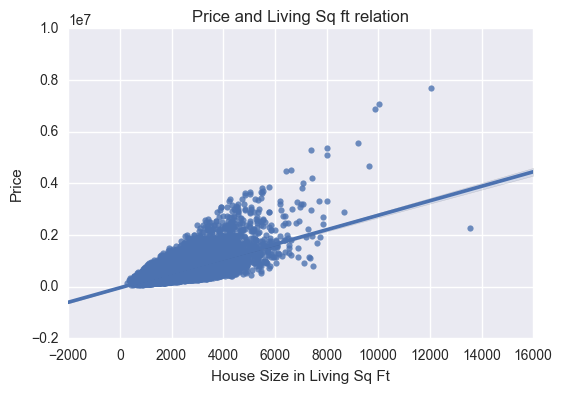

In [5]:
sns.regplot('sqft_living', 'price', data=home_data)
plt.title('Price and Living Sq ft relation')
plt.xlabel('House Size in Living Sq Ft')
plt.ylabel('Price')

## Create a simple regression model of sqft_living to price

Split data into training and testing.  
We use seed=1234 so that everyone running this notebook gets the same results.  In practice, you may set a random seed (or let GraphLab Create pick a random seed for you).  

In [12]:
train, test = sklearn.cross_validation.train_test_split(home_data, train_size = 0.8)

### Build the regression model using only sqft_living as a feature

In [ ]:
sqft_model = graphlab.linear_regression.create(train_data, target='price', features=['sqft_living'],validation_set=None)

### Evaluate the simple model

In [ ]:
print (test_data['price'].mean())

In [ ]:
print (sqft_model.evaluate(test_data))

RMSE of about \$255,170!

### Let's show what our predictions look like

In [ ]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],sqft_model.predict(test_data),'-')

Above:  blue dots are original data, green line is the prediction from the simple regression.

Below: we can view the learned regression coefficients. 

In [ ]:
sqft_model.get('coefficients')

#Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [ ]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [ ]:
sales[my_features].show()

In [ ]:
sales.show(view='BoxWhisker Plot', x='zipcode', y='price')

Pull the bar at the bottom to view more of the data.  

98039 is the most expensive zip code.

### Build a regression model with more features

In [ ]:
my_features_model = graphlab.linear_regression.create(train_data,target='price',features=my_features,validation_set=None)

In [ ]:
print my_features

### Comparing the results of the simple model with adding more features

In [ ]:
print sqft_model.evaluate(test_data)
print my_features_model.evaluate(test_data)

The RMSE goes down from \$255,170 to \$179,508 with more features.

### Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [ ]:
house1 = sales[sales['id']=='5309101200']

In [ ]:
print house1['price']

In [ ]:
print sqft_model.predict(house1)

In [ ]:
print my_features_model.predict(house1)

In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

##Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [ ]:
house2 = sales[sales['id']=='1925069082']

In [ ]:
print sqft_model.predict(house2)

In [ ]:
print my_features_model.predict(house2)

In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

## Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [ ]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

In [ ]:
print my_features_model.predict(graphlab.SFrame(bill_gates))

The model predicts a price of over $13M for this house! But we expect the house to cost much more.  (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)